# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Loading data

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
           'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df.columns = columns
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

In [6]:
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [7]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df_U = df.copy()
df_U.shape

(699, 11)

# Implementing the GTRS three-way clustering algorithm

## Initialize $\alpha = 1.0$, $\beta = 0.0$

In [9]:
alpha_initial = 1
beta_initial = 0

## Divide U into C and M

> C is the set of objects with no missing values and M is the set of objects with missing values. 

In [10]:
df_C = df_U[(df_U.notna()).all(axis=1)]
df_C.shape

(683, 11)

In [11]:
df_C.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [12]:
df_M = df_U[(df_U.isna()).any(axis=1)]
df_M.shape

(16, 11)

In [13]:
df_M.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2


In [14]:
df_M.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

## Apply K-mean clustering on C

In [15]:
k = 2

In [16]:
kmeans = KMeans(n_clusters=k, random_state=42).fit(df_C.iloc[:, 1:-1])
k_means = pd.DataFrame(kmeans.labels_, columns=['k-means'])
k_means.head()

,k-means
0,1
1,0
2,1
3,0
4,1


In [17]:
k_means.shape

(683, 1)

In [18]:
df_C_k_means = pd.concat([df_C.reset_index(drop=True), k_means], axis=1)
df_C_k_means.rename(index=lambda x : 'o_' + str(x + 1), inplace=True)
df_C_k_means

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_1,1000025,5,1,1,1,2,1.0,3,1,1,2,1
o_2,1002945,5,4,4,5,7,10.0,3,2,1,2,0
o_3,1015425,3,1,1,1,2,2.0,3,1,1,2,1
o_4,1016277,6,8,8,1,3,4.0,3,7,1,2,0
o_5,1017023,4,1,1,3,2,1.0,3,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
o_679,776715,3,1,1,1,3,2.0,1,1,1,2,1
o_680,841769,2,1,1,1,2,1.0,1,1,1,2,1
o_681,888820,5,10,10,3,7,3.0,8,10,2,4,0
o_682,897471,4,8,6,4,3,4.0,10,6,1,4,0


In [19]:
mpl.rcParams['figure.figsize'] = [16.0, 10.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['figure.titlesize'] = 'large'

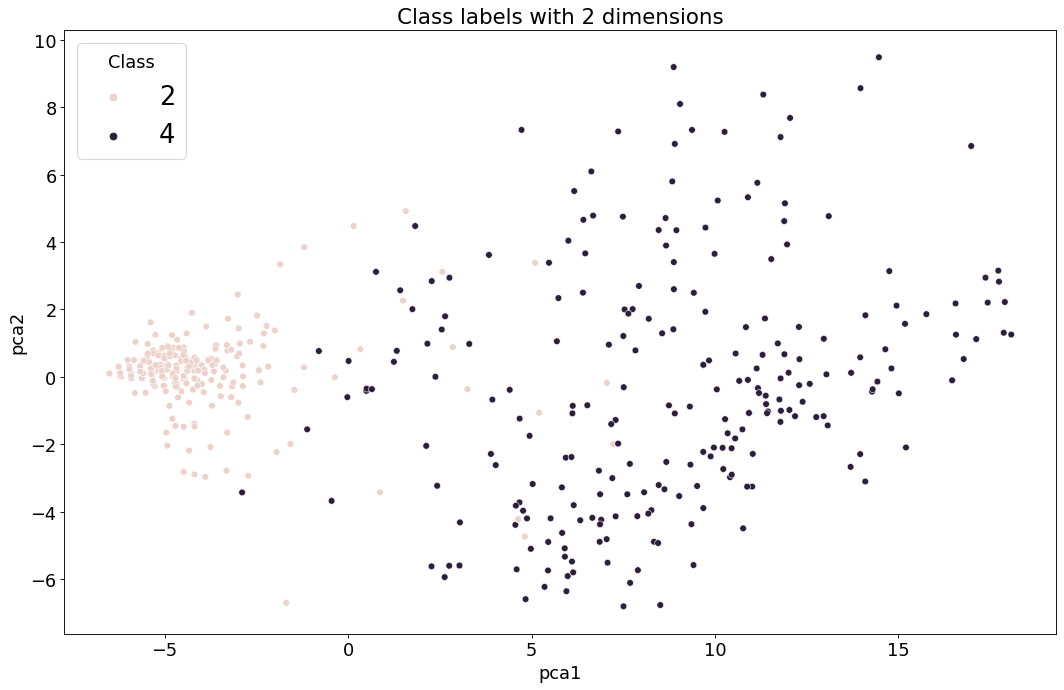

In [20]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_C_k_means.iloc[:, 1 : 10])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'], index=df_C_k_means.index)

sns.scatterplot(x="pca1", y="pca2", hue=df_C_k_means.loc[: , 'Class'], data=results)
plt.title('Class labels with 2 dimensions')
plt.show()

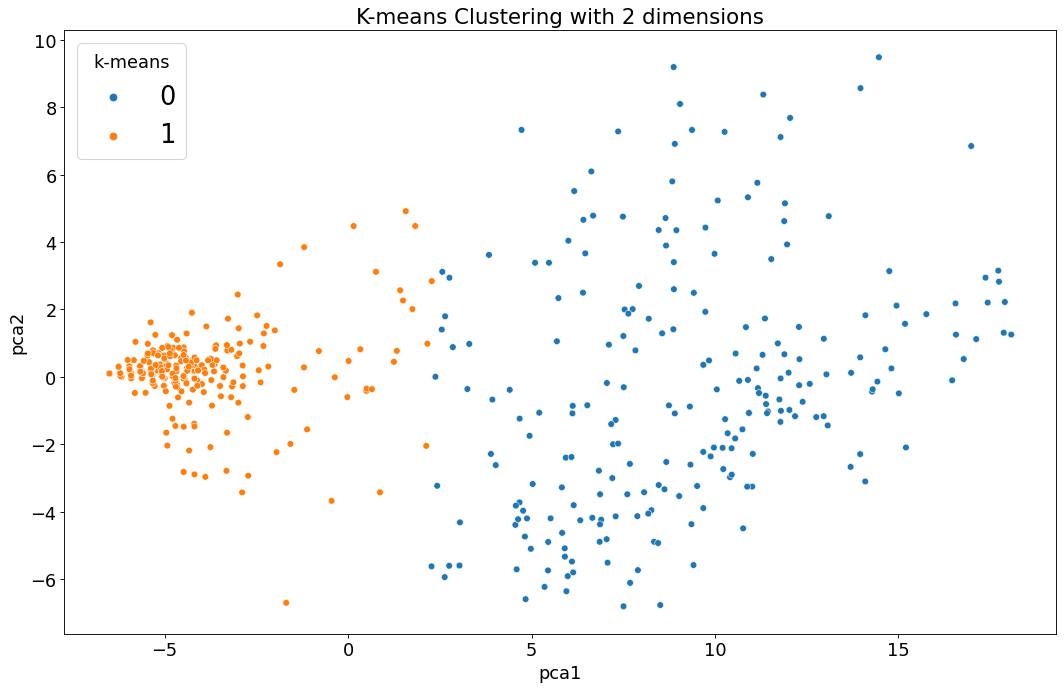

In [21]:
sns.scatterplot(x="pca1", y="pca2", hue=df_C_k_means.loc[: , 'k-means'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

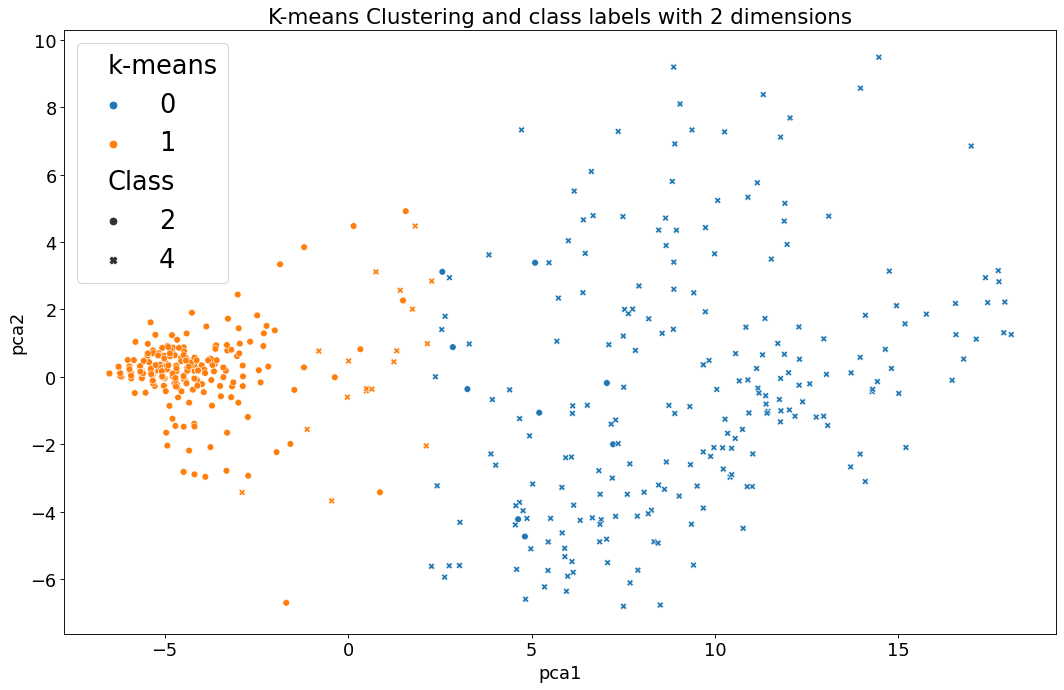

In [22]:
sns.scatterplot(x="pca1", y="pca2", hue=df_C_k_means.loc[: , 'k-means'], data=results, style=df_C_k_means.loc[: , 'Class'])
plt.title('K-means Clustering and class labels with 2 dimensions')
plt.show()

## Randomly remove values from C by following the percentage of missing values in M

In [23]:
missing_values_number = df_M.isnull().sum().sum()
missing_values_number


16

In [24]:
total_values_number = df_M.iloc[:, 1:].shape[0] * df_M.iloc[:, 1:-1].shape[1]
total_values_number

144

In [25]:
missing_value_ratio = missing_values_number/total_values_number
missing_value_ratio

0.1111111111111111

In [26]:
mask = np.random.choice([True, False], size=df_C_k_means.iloc[:, 1:-2].shape, p=[missing_value_ratio,1-missing_value_ratio])
df_C_k_means.iloc[:, 1:-2].mask(mask)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
o_1,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
o_2,5.0,NaN,4.0,5.0,NaN,10.0,3.0,2.0,1.0
o_3,3.0,1.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0
o_4,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,NaN
o_5,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
o_679,3.0,1.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0
o_680,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
o_681,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
o_682,NaN,NaN,6.0,NaN,3.0,4.0,10.0,NaN,NaN


In [27]:
new_df_C = pd.concat([df_C_k_means.iloc[:, 0], df_C_k_means.iloc[:, 1:-2].mask(mask), df_C_k_means.iloc[:, -2:]], axis=1)
new_df_C.shape

(683, 12)

## Divide C into Uc and Um

> Uc is the set of objects with no missing values and Um is the set of objects with simulated missing values.

In [28]:
df_Uc= new_df_C[(new_df_C.notna()).all(axis=1)]
df_Uc.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
k-means                        0
dtype: int64

In [29]:
df_Uc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_1,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2,1
o_5,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2,1
o_6,1017122,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4,0
o_7,1018099,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2,1
o_9,1033078,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2,1


In [30]:
df_Uc.shape

(227, 12)

In [31]:
df_Um = new_df_C[(new_df_C.isna()).any(axis=1)]
df_Um.isnull().sum()

Sample code number              0
Clump Thickness                91
Uniformity of Cell Size        85
Uniformity of Cell Shape       81
Marginal Adhesion              76
Single Epithelial Cell Size    68
Bare Nuclei                    74
Bland Chromatin                78
Normal Nucleoli                92
Mitoses                        76
Class                           0
k-means                         0
dtype: int64

In [32]:
df_Um.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_2,1002945,5.0,NaN,4.0,5.0,NaN,10.0,3.0,2.0,1.0,2,0
o_3,1015425,3.0,1.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,2,1
o_4,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,NaN,2,0
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,NaN,1.0,2,1
o_10,1033078,4.0,2.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,2,1


In [33]:
df_Um.shape

(456, 12)

In [34]:
df_Um

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_2,1002945,5.0,NaN,4.0,5.0,NaN,10.0,3.0,2.0,1.0,2,0
o_3,1015425,3.0,1.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,2,1
o_4,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,NaN,2,0
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,NaN,1.0,2,1
o_10,1033078,4.0,2.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
o_677,714039,NaN,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,2,1
o_678,763235,3.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,2,1
o_679,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,2,1
o_682,897471,NaN,NaN,6.0,NaN,3.0,4.0,10.0,NaN,NaN,4,0


In [35]:
new_df_Um = df_Um.copy()

for index_Uc in df_Uc.index:
    distance_list = []
    for index_Um in df_Um.index:
        result = 0
        row_Um = df_Um.loc[index_Um, 'Clump Thickness' : 'Mitoses']
        for attribute in row_Um.index:
            if pd.notna(row_Um[attribute]):
                result += math.pow(row_Um[attribute] - df_Uc.loc[index_Uc, attribute], 2)
        distance_list.append(math.sqrt(result))
    new_df_Um = pd.concat([new_df_Um, pd.DataFrame(distance_list, index = df_Um.index, columns=[index_Uc])], axis=1)

In [36]:
new_df_Um.shape

(456, 239)

In [37]:
new_df_Um.iloc[:, 12:]

,o_1,o_5,o_6,o_7,o_9,o_12,o_18,o_23,o_24,o_30,...,o_651,o_652,o_660,o_667,o_668,o_669,o_671,o_676,o_680,o_681
o_2,10.344080,9.797959,10.723805,6.480741,11.661904,10.816654,10.392305,10.583005,11.090537,10.583005,...,10.000000,10.535654,10.148892,10.295630,11.269428,11.269428,11.269428,8.124038,10.954451,13.379088
o_3,2.236068,2.449490,19.287302,8.246211,4.690416,1.732051,1.414214,1.414214,2.236068,1.414214,...,3.605551,1.000000,3.872983,2.449490,3.000000,3.000000,3.000000,14.177447,2.449490,16.673332
o_4,12.041595,12.328828,12.206556,14.000000,12.806248,12.688578,12.165525,12.409674,13.000000,12.529964,...,11.135529,12.369317,10.908712,11.575837,13.152946,13.152946,13.152946,6.082763,12.806248,8.000000
o_8,3.162278,3.000000,18.627936,9.110434,4.582576,1.414214,2.236068,1.732051,1.414214,1.732051,...,4.000000,1.414214,3.464102,3.162278,2.449490,2.449490,2.449490,13.674794,2.236068,13.711309
o_10,1.414214,2.236068,16.462078,3.162278,4.582576,2.236068,1.000000,1.414214,3.162278,1.732051,...,2.000000,1.414214,3.162278,1.732051,3.162278,3.162278,3.162278,13.228757,2.236068,16.031220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o_677,2.000000,2.000000,19.183326,9.219544,4.000000,1.000000,2.000000,1.000000,2.000000,1.414214,...,1.732051,2.000000,3.000000,2.236068,0.000000,0.000000,0.000000,14.142136,0.000000,17.944358
o_678,2.449490,2.645751,19.798990,9.327379,3.316625,1.414214,1.732051,1.000000,2.449490,1.414214,...,2.828427,1.414214,3.464102,2.449490,2.449490,2.449490,2.449490,14.387495,1.732051,15.329710
o_679,3.162278,3.316625,19.493589,8.544004,4.358899,2.000000,2.645751,1.732051,3.162278,2.449490,...,3.162278,2.449490,3.464102,3.162278,2.449490,2.449490,2.449490,14.177447,1.732051,15.394804
o_682,9.165151,9.165151,8.306624,10.535654,10.770330,9.949874,9.165151,9.949874,9.165151,10.099505,...,10.344080,9.165151,9.746794,9.165151,10.770330,10.770330,10.770330,7.348469,10.770330,6.082763


In [38]:
n_neighbours = round(df_Uc.shape[0] / 3)
n_neighbours

76

In [39]:
c1_list = []
c2_list = []
for index_Um in new_df_Um.index:
    c1_num = 0
    c2_num = 0
    row_Um = new_df_Um.loc[index_Um, :].iloc[ 12:].sort_values(ascending=True)[ : n_neighbours]
    for i in row_Um.index:
        if df_Uc.loc[i, 'k-means'] == 0:
            c1_num += 1
        else:
            c2_num += 1
    c1_list.append(c1_num)
    c2_list.append(c2_num)

In [40]:
new_df_Um = pd.concat([new_df_Um, pd.DataFrame(c1_list, index = new_df_Um.index, columns=['e_c1']), pd.DataFrame(c2_list, index = new_df_Um.index, columns=['e_c2'])], axis=1)

In [41]:
new_df_Um.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,...,o_660,o_667,o_668,o_669,o_671,o_676,o_680,o_681,e_c1,e_c2
o_2,1002945,5.0,NaN,4.0,5.0,NaN,10.0,3.0,2.0,1.0,...,10.148892,10.295630,11.269428,11.269428,11.269428,8.124038,10.954451,13.379088,47,29
o_3,1015425,3.0,1.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,...,3.872983,2.449490,3.000000,3.000000,3.000000,14.177447,2.449490,16.673332,0,76
o_4,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,NaN,...,10.908712,11.575837,13.152946,13.152946,13.152946,6.082763,12.806248,8.000000,46,30
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,NaN,1.0,...,3.464102,3.162278,2.449490,2.449490,2.449490,13.674794,2.236068,13.711309,0,76
o_10,1033078,4.0,2.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,...,3.162278,1.732051,3.162278,3.162278,3.162278,13.228757,2.236068,16.031220,0,76


In [42]:
new_df_Um.shape

(456, 241)

## Evaluate objects in M using equation below:

$e({c}_{k},\ {o}_{i}) = \frac{Number\ of\ {o}_{i}\ neighbors\ belonging\ to\ {c}_{k}}{Total\ neighbors\ of\ {o}_{i}}$

In [43]:
new_df_Um.iloc[:, -2:]

,e_c1,e_c2
o_2,47,29
o_3,0,76
o_4,46,30
o_8,0,76
o_10,0,76
...,...,...
o_677,0,76
o_678,0,76
o_679,0,76
o_682,57,19


In [44]:
new_df_Um.iloc[:, -2:] = new_df_Um.iloc[:, -2:] / n_neighbours
new_df_Um.iloc[:, -2:]

,e_c1,e_c2
o_2,0.618421,0.381579
o_3,0.000000,1.000000
o_4,0.605263,0.394737
o_8,0.000000,1.000000
o_10,0.000000,1.000000
...,...,...
o_677,0.000000,1.000000
o_678,0.000000,1.000000
o_679,0.000000,1.000000
o_682,0.750000,0.250000


In [45]:
new_df_Um.iloc[:, [11, -2, -1]]

,k-means,e_c1,e_c2
o_2,0,0.618421,0.381579
o_3,1,0.000000,1.000000
o_4,0,0.605263,0.394737
o_8,1,0.000000,1.000000
o_10,1,0.000000,1.000000
...,...,...,...
o_677,1,0.000000,1.000000
o_678,1,0.000000,1.000000
o_679,1,0.000000,1.000000
o_682,0,0.750000,0.250000


## Calculate the utilities of players by using these equations below:

$Accuracy(α,\ β) = \frac{Correctly\ clustered\ objects}{Total\ clustered\ objects}$

$Generality(α,\ β) = \frac{Total\ clustered\ objects}{Total\ objects\ in\ U}$

In [46]:
def calculator(alpha, beta):
    df = new_df_Um.iloc[:, [11, -2, -1]].copy()
    df['Inside_c1'] = ((df['e_c1'] >= alpha) & (df['e_c2'] <= beta))
    df['Inside_c2'] = ((df['e_c2'] >= alpha) & (df['e_c1'] <= beta))
    df['correctly_clustered'] = (((df['Inside_c1']==True) & (df['k-means']==0)) | ((df['Inside_c2']==True) & (df['k-means']==1)))

    total_objects = df.shape[0]
    total_clustered_objects = (df['Inside_c1']==True).sum() + (df['Inside_c2']==True).sum()
    correctly_clustered_objects = (df['correctly_clustered']==True).sum()

    accuracy = correctly_clustered_objects / total_clustered_objects
    generality = total_clustered_objects / total_objects
    
    return accuracy, generality

accuracy, generality = calculator(alpha_initial, beta_initial)

print(accuracy, generality)

1.0 0.618421052631579


## Populate the payoff table with calculated values

In [47]:
alpha_1 = 0.975
alpha_2 = 0.95
beta_1 = 0.025
beta_2 = 0.05

In [48]:
df = pd.DataFrame(index=['alpha-', 'beta+', 'alpha-beta+'], columns=['alpha-', 'beta+', 'alpha-beta+']).fillna(str(alpha_initial) + ', ' + str(beta_initial))
df

,alpha-,beta+,alpha-beta+
alpha-,"1, 0","1, 0","1, 0"
beta+,"1, 0","1, 0","1, 0"
alpha-beta+,"1, 0","1, 0","1, 0"


In [49]:
for index in df.index:
    for column in df.columns:
        if index in ['alpha-', 'alpha-beta+']:
            if column in ['alpha-', 'alpha-beta+']:
                df.loc[index, column] = str(alpha_2) + ', ' + df.loc[index, column].split(', ')[1]
            else:
                df.loc[index, column] = str(alpha_1) + ', ' + df.loc[index, column].split(', ')[1]
        else:
            if column in ['alpha-', 'alpha-beta+']:
                df.loc[index, column] = str(alpha_1) + ', ' + df.loc[index, column].split(', ')[1]
for index in df.index:
    for column in df.columns:                 
        if index in ['beta+', 'alpha-beta+']:
            if column in ['beta+', 'alpha-beta+']:
                df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(beta_2)
            else:
                df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(beta_1)
        else:
            if column in ['beta+', 'alpha-beta+']:
                df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(beta_1)
df

,alpha-,beta+,alpha-beta+
alpha-,"0.95, 0","0.975, 0.025","0.95, 0.025"
beta+,"0.975, 0.025","1, 0.05","0.975, 0.05"
alpha-beta+,"0.95, 0.025","0.975, 0.05","0.95, 0.05"


## Calculate equilibrium in a payoff table by using these equations below:

$For\ Accuracy: {\forall}_{{S}_{m}} \in {S}_{A},\ {u}_{A}({S}_{m}, {S}_{n}) \geq {u}_{A}({S}’_{m},\ {S}_{n}),\ where\ ({S}’_{m} \neq {S}_{m}).$

$For\ Generality: {\forall}_{{S}_{n}} \in {S}_{G},\ {u}_{G}({S}_{m}, {S}_{n}) \geq {u}_{G}({S}_{m},\ {S}’_{n}),\ where\ ({S}’_{n} \neq {S}_{n}).$

In [50]:
best_performance = 0
accuracy_threshold = 0.9

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        result = calculator(float(df.iloc[i,j].split(', ')[0]), float(float(df.iloc[i,j].split(', ')[1])))
        df.iloc[i,j] = df.iloc[i,j].split(', ')[0] + ', ' + df.iloc[i,j].split(', ')[1] + ', ' + str(round(result[0], 3)) + ', ' + str(round(result[1], 3))
        if ((result[0] >= accuracy_threshold) & (best_performance < (result[0] + result[1]))):
            best_performance = result[0] + result[1]
            best_accuracy = result[0]
            best_generality = result[1]
            best_accuracy_parameter = df.index[i]
            best_generality_parameter = df.columns[j]
df

,alpha-,beta+,alpha-beta+
alpha-,"0.95, 0, 1.0, 0.618","0.975, 0.025, 1.0, 0.643","0.95, 0.025, 1.0, 0.643"
beta+,"0.975, 0.025, 1.0, 0.643","1, 0.05, 1.0, 0.618","0.975, 0.05, 1.0, 0.643"
alpha-beta+,"0.95, 0.025, 1.0, 0.643","0.975, 0.05, 1.0, 0.643","0.95, 0.05, 1.0, 0.704"


In [51]:
print(f'Best performance: {best_performance}')
print(f'Best accuracy: {best_accuracy}')
print(f'Best generality: {best_generality}')
print(f'Best accuracy parameter: {best_accuracy_parameter}')
print(f'Best generality parameter: {best_generality_parameter}')

Best performance: 1.7039473684210527
Best accuracy: 1.0
Best generality: 0.7039473684210527
Best accuracy parameter: alpha-beta+
Best generality parameter: alpha-beta+


## Determine selected strategies and corresponding thresholds $(\alpha’, \beta’)$

In [52]:
c = 1.05

alpha_1 = alpha_initial - (alpha_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
alpha_2 = alpha_initial - c * (alpha_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
beta_1 = beta_initial - (beta_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
beta_2 = beta_initial - c * (beta_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])

## Repeat

In [53]:
def threshold_iterator(alpha_initial, beta_initial, alpha_1, alpha_2, beta_1, beta_2, c):
    df = pd.DataFrame(index=['alpha-', 'beta+', 'alpha-beta+'], columns=['alpha-', 'beta+', 'alpha-beta+']).fillna(str(alpha_initial) + ', ' + str(beta_initial))
    for index in df.index:
        for column in df.columns:
            if index in ['alpha-', 'alpha-beta+']:
                if column in ['alpha-', 'alpha-beta+']:
                    df.loc[index, column] = str(round(alpha_2, 3)) + ', ' + df.loc[index, column].split(', ')[1]
                else:
                    df.loc[index, column] = str(round(alpha_1, 3)) + ', ' + df.loc[index, column].split(', ')[1]
            else:
                if column in ['alpha-', 'alpha-beta+']:
                    df.loc[index, column] = str(round(alpha_1, 3)) + ', ' + df.loc[index, column].split(', ')[1]
    for index in df.index:
        for column in df.columns:                 
            if index in ['beta+', 'alpha-beta+']:
                if column in ['beta+', 'alpha-beta+']:
                    df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(round(beta_2, 3))
                else:
                    df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(round(beta_1, 3))
            else:
                if column in ['beta+', 'alpha-beta+']:
                    df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(round(beta_1, 3))

    best_performance = 0
    accuracy_threshold = 0.9
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            result = calculator(float(df.iloc[i,j].split(', ')[0]), float(float(df.iloc[i,j].split(', ')[1])))
            df.iloc[i,j] = df.iloc[i,j].split(', ')[0] + ', ' + df.iloc[i,j].split(', ')[1] + ', ' + str(round(result[0], 3)) + ', ' + str(round(result[1], 3))
            if ((result[0] >= accuracy_threshold) & (best_performance < (result[0] + result[1]))):
                best_performance = result[0] + result[1]
                best_accuracy = round(result[0], 3)
                best_generality = round(result[1], 3)
                alpha_new = float(df.iloc[i,j].split(', ')[0])
                beta_new = float(df.iloc[i,j].split(', ')[1])
    print(df)

    alpha_1 = alpha_initial - (alpha_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
    alpha_2 = alpha_initial - c * (alpha_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
    beta_1 = beta_initial - (beta_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
    beta_2 = beta_initial - c * (beta_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
     
    return alpha_new, beta_new, alpha_1, alpha_2, beta_1, beta_2, best_accuracy, best_generality

## $(\alpha, \beta) = (\alpha’, \beta’)$

In [54]:
alpha_initial = 1
beta_initial = 0

alpha_1 = 0.975
alpha_2 = 0.95
beta_1 = 0.025
beta_2 = 0.05

alpha_list = []
beta_list = []
accuracy_list = []
generality_list = []

accuracy, generality = calculator(alpha_initial, beta_initial)
for i in range(5):
    if ((accuracy <= generality) | (alpha_initial <= 0.5) | (beta_initial >= 0.5)):
        break
    else:
        results = threshold_iterator(alpha_initial, beta_initial, alpha_1, alpha_2, beta_1, beta_2, c = 2)
        alpha_list.append(alpha_initial)
        beta_list.append(beta_initial)
    
        alpha_initial = results[0]
        beta_initial = results[1]

        alpha_1 = results[2]
        alpha_2 = results[3]
        beta_1 = results[4]
        beta_2 = results[5]
        accuracy = results[6]
        generality = results[7]
    
        accuracy_list.append(accuracy)
        generality_list.append(generality)


print(alpha_list)
print(beta_list)
print(accuracy_list)
print(generality_list)

                               alpha-                     beta+  \
alpha-            0.95, 0, 1.0, 0.618  0.975, 0.025, 1.0, 0.643   
beta+        0.975, 0.025, 1.0, 0.643       1, 0.05, 1.0, 0.618   
alpha-beta+   0.95, 0.025, 1.0, 0.643   0.975, 0.05, 1.0, 0.643   

                         alpha-beta+  
alpha-       0.95, 0.025, 1.0, 0.643  
beta+        0.975, 0.05, 1.0, 0.643  
alpha-beta+   0.95, 0.05, 1.0, 0.704  
                                 alpha-                       beta+  \
alpha-          0.829, 0.05, 1.0, 0.704  0.914, 0.618, 0.997, 0.759   
beta+        0.914, 0.618, 0.997, 0.759     0.95, 1.237, 1.0, 0.704   
alpha-beta+  0.829, 0.618, 0.995, 0.849  0.914, 1.237, 0.997, 0.759   

                            alpha-beta+  
alpha-       0.829, 0.618, 0.995, 0.849  
beta+        0.914, 1.237, 0.997, 0.759  
alpha-beta+  0.829, 1.237, 0.995, 0.849  
[1, 0.95]
[0, 0.05]
[1.0, 0.995]
[0.704, 0.849]


In [55]:
final_df_Um = new_df_Um.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -2, -1]].copy()
final_df_Um

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means,e_c1,e_c2
o_2,1002945,5.0,NaN,4.0,5.0,NaN,10.0,3.0,2.0,1.0,2,0,0.618421,0.381579
o_3,1015425,3.0,1.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,2,1,0.000000,1.000000
o_4,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,NaN,2,0,0.605263,0.394737
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,NaN,1.0,2,1,0.000000,1.000000
o_10,1033078,4.0,2.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,2,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o_677,714039,NaN,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,2,1,0.000000,1.000000
o_678,763235,3.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,2,1,0.000000,1.000000
o_679,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,2,1,0.000000,1.000000
o_682,897471,NaN,NaN,6.0,NaN,3.0,4.0,10.0,NaN,NaN,4,0,0.750000,0.250000


## Until $Accuracy(\alpha, \beta) ≤ Generality(\alpha, \beta)$ or $\alpha \leq 0.5$ or $\beta ≥ 0.5$ or maximum iterations reached

In [56]:
accuracy = 0
generality = 0
accuracy_threshold = 0.9
for i in range(len(alpha_list)):
    if (accuracy_list[i] >= accuracy_threshold) & (accuracy + generality < (accuracy_list[i] + generality_list[i])):
        alpha_final = alpha_list[i]
        beta_final = beta_list[i]
        accuracy_final = accuracy_list[i]
        generality = generality_list[i]


print(f'Final alpha: {alpha_final}')
print(f'Final beta: {beta_final}')
print(f'Final accuracy: {accuracy_final}')
print(f'Final generality: {generality}')

Final alpha: 0.95
Final beta: 0.05
Final accuracy: 0.995
Final generality: 0.849


## Use $(\alpha, \beta)$ determined in before, with a three-way framework of these equations below for assigning objects to different regions of a cluster:

$Inside({c}_{k}) = \left \{{O}_{i} \in U \mid e({c}_{k},\ {o}_{i}) \geq \alpha \right \}$


$Partial({c}_{k}) = \left \{{O}_{i} \in U \mid \beta < e({c}_{k},\ {o}_{i}) < \alpha \right \}$


$Outside({c}_{k}) = \left \{{O}_{i} \in U \mid e({c}_{k},\ {o}_{i}) \leq \beta \right \}$

In [57]:
final_df_Um['Inside_c1'] = ((final_df_Um['e_c1'] >= alpha_final) & (final_df_Um['e_c2'] <= beta_final))
final_df_Um['Inside_c2'] = ((final_df_Um['e_c2'] >= alpha_final) & (final_df_Um['e_c1'] <= beta_final))
final_df_Um['Partial_c1_c2'] = final_df_Um.apply(lambda x: True if ((x['Inside_c1'] == False) & (x['Inside_c2'] == False)) else False, axis=1)

final_df_Um


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means,e_c1,e_c2,Inside_c1,Inside_c2,Partial_c1_c2
o_2,1002945,5.0,NaN,4.0,5.0,NaN,10.0,3.0,2.0,1.0,2,0,0.618421,0.381579,False,False,True
o_3,1015425,3.0,1.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,2,1,0.000000,1.000000,False,True,False
o_4,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,NaN,2,0,0.605263,0.394737,False,False,True
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,NaN,1.0,2,1,0.000000,1.000000,False,True,False
o_10,1033078,4.0,2.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,2,1,0.000000,1.000000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o_677,714039,NaN,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,2,1,0.000000,1.000000,False,True,False
o_678,763235,3.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,2,1,0.000000,1.000000,False,True,False
o_679,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,2,1,0.000000,1.000000,False,True,False
o_682,897471,NaN,NaN,6.0,NaN,3.0,4.0,10.0,NaN,NaN,4,0,0.750000,0.250000,False,False,True


In [58]:
final_df_Um['Three-way GTRS'] = final_df_Um['Inside_c1'].astype(str) + final_df_Um['Inside_c2'].astype(str) + final_df_Um['Partial_c1_c2'].astype(str)
final_df_Um['Three-way GTRS'].replace('TrueFalseFalse', 1, inplace=True)
final_df_Um['Three-way GTRS'].replace('FalseTrueFalse', 2, inplace=True)
final_df_Um['Three-way GTRS'].replace('FalseFalseTrue', 0, inplace=True)
final_df_Um['Three-way GTRS'].unique()

array([0, 2, 1])

In [59]:
final_df_Um.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means,e_c1,e_c2,Inside_c1,Inside_c2,Partial_c1_c2,Three-way GTRS
o_2,1002945,5.0,NaN,4.0,5.0,NaN,10.0,3.0,2.0,1.0,2,0,0.618421,0.381579,False,False,True,0
o_3,1015425,3.0,1.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,2,1,0.000000,1.000000,False,True,False,2
o_4,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,NaN,2,0,0.605263,0.394737,False,False,True,0
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,NaN,1.0,2,1,0.000000,1.000000,False,True,False,2
o_10,1033078,4.0,2.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,2,1,0.000000,1.000000,False,True,False,2


In [60]:
df_Um_visual = pd.merge(final_df_Um.iloc[: , 0], df_C_k_means, left_index=True, right_index=True, how="inner")
df_Um_visual.head()

,Sample code number_x,Sample code number_y,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_2,1002945,1002945,5,4,4,5,7,10.0,3,2,1,2,0
o_3,1015425,1015425,3,1,1,1,2,2.0,3,1,1,2,1
o_4,1016277,1016277,6,8,8,1,3,4.0,3,7,1,2,0
o_8,1018561,1018561,2,1,2,1,2,1.0,3,1,1,2,1
o_10,1033078,1033078,4,2,1,1,2,1.0,2,1,1,2,1


In [61]:
df_Um_visual = pd.concat([final_df_Um.iloc[: , 0], df_Um_visual.iloc[: , 2:], final_df_Um.iloc[: , -6:]], axis=1)
df_Um_visual.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means,e_c1,e_c2,Inside_c1,Inside_c2,Partial_c1_c2,Three-way GTRS
o_2,1002945,5,4,4,5,7,10.0,3,2,1,2,0,0.618421,0.381579,False,False,True,0
o_3,1015425,3,1,1,1,2,2.0,3,1,1,2,1,0.000000,1.000000,False,True,False,2
o_4,1016277,6,8,8,1,3,4.0,3,7,1,2,0,0.605263,0.394737,False,False,True,0
o_8,1018561,2,1,2,1,2,1.0,3,1,1,2,1,0.000000,1.000000,False,True,False,2
o_10,1033078,4,2,1,1,2,1.0,2,1,1,2,1,0.000000,1.000000,False,True,False,2


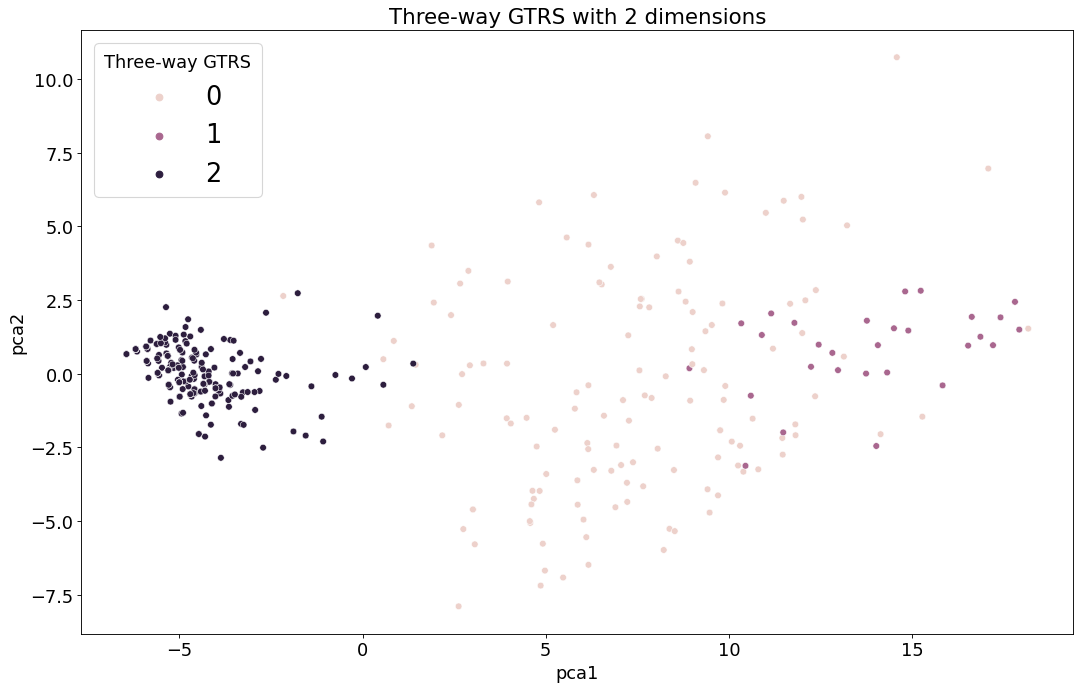

In [62]:
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(df_Um_visual.iloc[:, 1 : 10])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'], index=df_Um_visual.index)

sns.scatterplot(x="pca1", y="pca2", hue=df_Um_visual.loc[: , 'Three-way GTRS'], data=results)
plt.title('Three-way GTRS with 2 dimensions')
plt.show()

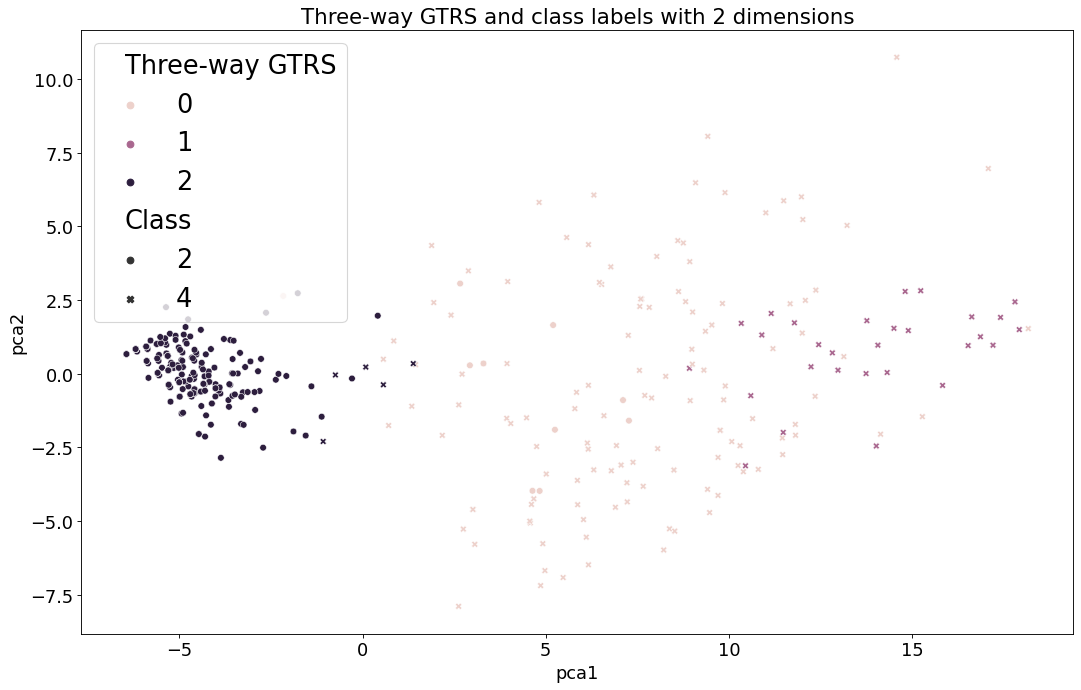

In [63]:
sns.scatterplot(x="pca1", y="pca2", hue=df_Um_visual.loc[: , 'Three-way GTRS'], data=results, style=df_Um_visual.loc[: , 'Class'])
plt.title('Three-way GTRS and class labels with 2 dimensions')
plt.show()

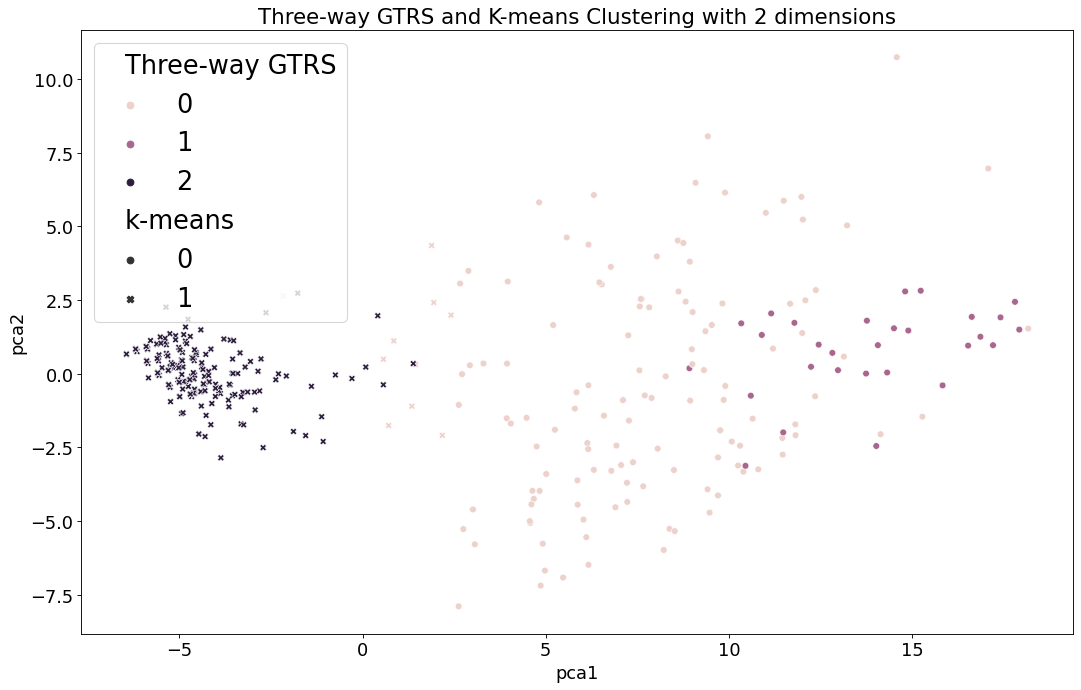

In [64]:
sns.scatterplot(x="pca1", y="pca2", hue=df_Um_visual.loc[: , 'Three-way GTRS'], data=results, style=df_Um_visual.loc[: , 'k-means'])
plt.title('Three-way GTRS and K-means Clustering with 2 dimensions')
plt.show()